In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [3]:
bike=pd.read_csv("bikes.csv")
bike

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,rented_bikes_count
0,2011-01-01 00:00:00,Spring,0.0,0.0,Clear,9.84,81.0,NaN,3,13,16
1,2011-01-01 01:00:00,Spring,0.0,0.0,NaN,9.02,80.0,0.0000,8,32,40
2,2011-01-01 02:00:00,Spring,0.0,0.0,Clear,9.02,NaN,0.0000,5,27,32
3,2011-01-01 03:00:00,Spring,0.0,0.0,Clear,9.84,75.0,0.0000,3,10,13
4,2011-01-01 04:00:00,NaN,0.0,0.0,Clear,NaN,75.0,NaN,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,Winter,0.0,1.0,Clear,15.58,50.0,26.0027,7,329,336
10882,2012-12-19 20:00:00,Winter,0.0,1.0,NaN,14.76,NaN,NaN,10,231,241
10883,2012-12-19 21:00:00,NaN,0.0,1.0,Clear,13.94,61.0,15.0013,4,164,168
10884,2012-12-19 22:00:00,Winter,NaN,1.0,Clear,13.94,NaN,6.0032,12,117,129


# 1-Make Profit Feature


In [4]:
def prof(x):
    profit=(x['casual']*20)+(x['registered']*5)
    tax=profit*0.14
    maintance=1500/(365*24)
    pro=profit-(tax+maintance)
    return pro

bike['profit']=bike.apply(prof,axis=1)
bike    

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,rented_bikes_count,profit
0,2011-01-01 00:00:00,Spring,0.0,0.0,Clear,9.84,81.0,NaN,3,13,16,107.328767
1,2011-01-01 01:00:00,Spring,0.0,0.0,NaN,9.02,80.0,0.0000,8,32,40,275.028767
2,2011-01-01 02:00:00,Spring,0.0,0.0,Clear,9.02,NaN,0.0000,5,27,32,201.928767
3,2011-01-01 03:00:00,Spring,0.0,0.0,Clear,9.84,75.0,0.0000,3,10,13,94.428767
4,2011-01-01 04:00:00,NaN,0.0,0.0,Clear,NaN,75.0,NaN,0,1,1,4.128767
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,Winter,0.0,1.0,Clear,15.58,50.0,26.0027,7,329,336,1534.928767
10882,2012-12-19 20:00:00,Winter,0.0,1.0,NaN,14.76,NaN,NaN,10,231,241,1165.128767
10883,2012-12-19 21:00:00,NaN,0.0,1.0,Clear,13.94,61.0,15.0013,4,164,168,773.828767
10884,2012-12-19 22:00:00,Winter,NaN,1.0,Clear,13.94,NaN,6.0032,12,117,129,709.328767


# 2-distribution of rental_bike count and prof


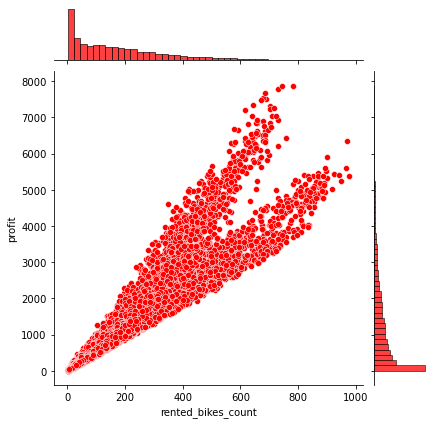

In [5]:
sns.jointplot(x="rented_bikes_count",y="profit",data=bike,color='red')

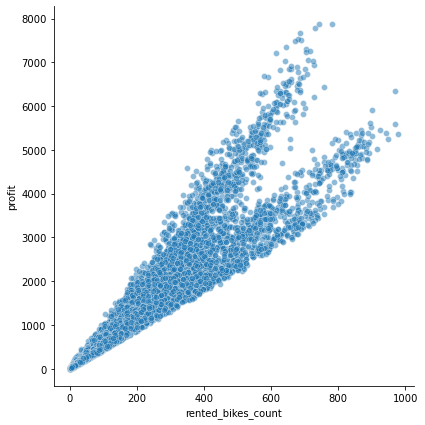

In [6]:
sns.relplot(x="rented_bikes_count", y="profit",sizes=(40, 400), alpha=.5, palette="muted",height=6, data=bike)

In [7]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   datetime            10886 non-null  object 
 1   season              10672 non-null  object 
 2   holiday             10030 non-null  float64
 3   workingday          9388 non-null   float64
 4   weather             8746 non-null   object 
 5   temp                8104 non-null   float64
 6   humidity            7462 non-null   float64
 7   windspeed           6820 non-null   float64
 8   casual              10886 non-null  int64  
 9   registered          10886 non-null  int64  
 10  rented_bikes_count  10886 non-null  int64  
 11  profit              10886 non-null  float64
dtypes: float64(6), int64(3), object(3)
memory usage: 1020.7+ KB


# profit for each day

In [8]:
bike['day']=bike['datetime'].apply(lambda dt:dt.split()[0])

bike.groupby('day').sum()['profit']

# more regst and prof

In [9]:
bike.groupby("season").sum()['registered']


season
Fall      488252
Spring    265322
Summer    446991
Winter    457276
Name: registered, dtype: int64

In [10]:
bike.groupby("season").sum()['profit']

season
Fall      4.509295e+06
Spring    1.836294e+06
Summer    4.093775e+06
Winter    3.286013e+06
Name: profit, dtype: float64

# which weather has mor reg and prof

In [11]:
bike.groupby("weather").sum()["registered"]

weather
Clear    951449
Mist     336229
Rainy     70204
Snowy       158
Name: registered, dtype: int64

In [12]:
bike.groupby("weather").sum()["profit"]

weather
Clear    8.062699e+06
Mist     2.645321e+06
Rainy    5.096033e+05
Snowy    7.824288e+02
Name: profit, dtype: float64

In [13]:
bike.corr()[['profit','rented_bikes_count']]

,profit,rented_bikes_count
holiday,0.017410,-0.005827
workingday,-0.150218,0.010940
temp,0.462618,0.391867
humidity,-0.358150,-0.317282
windspeed,0.100205,0.097747
casual,0.902713,0.690414
registered,0.822156,0.970948
rented_bikes_count,0.934490,1.000000
profit,1.000000,0.934490


<AxesSubplot:>

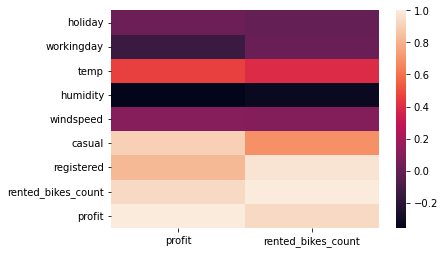

In [14]:
sns.heatmap(bike.corr()[['profit','rented_bikes_count']])

# rent during rush hours

In [15]:
bike['datetime']=pd.to_datetime(bike['datetime'],format="%Y/%m/%d %H:%M:%S")
bike['rent']=bike['datetime'].dt.hour
bike

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,rented_bikes_count,profit,day,rent
0,2011-01-01 00:00:00,Spring,0.0,0.0,Clear,9.84,81.0,NaN,3,13,16,107.328767,2011-01-01,0
1,2011-01-01 01:00:00,Spring,0.0,0.0,NaN,9.02,80.0,0.0000,8,32,40,275.028767,2011-01-01,1
2,2011-01-01 02:00:00,Spring,0.0,0.0,Clear,9.02,NaN,0.0000,5,27,32,201.928767,2011-01-01,2
3,2011-01-01 03:00:00,Spring,0.0,0.0,Clear,9.84,75.0,0.0000,3,10,13,94.428767,2011-01-01,3
4,2011-01-01 04:00:00,NaN,0.0,0.0,Clear,NaN,75.0,NaN,0,1,1,4.128767,2011-01-01,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,Winter,0.0,1.0,Clear,15.58,50.0,26.0027,7,329,336,1534.928767,2012-12-19,19
10882,2012-12-19 20:00:00,Winter,0.0,1.0,NaN,14.76,NaN,NaN,10,231,241,1165.128767,2012-12-19,20
10883,2012-12-19 21:00:00,NaN,0.0,1.0,Clear,13.94,61.0,15.0013,4,164,168,773.828767,2012-12-19,21
10884,2012-12-19 22:00:00,Winter,NaN,1.0,Clear,13.94,NaN,6.0032,12,117,129,709.328767,2012-12-19,22


In [16]:
bike[bike['rent'].between(7,9)]

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,rented_bikes_count,profit,day,rent
7,2011-01-01 07:00:00,Spring,0.0,0.0,Clear,8.20,NaN,NaN,1,2,3,25.628767,2011-01-01,7
8,2011-01-01 08:00:00,Spring,0.0,0.0,NaN,9.84,NaN,0.0000,1,7,8,47.128767,2011-01-01,8
9,2011-01-01 09:00:00,Spring,0.0,0.0,Clear,NaN,76.0,0.0000,8,6,14,163.228767,2011-01-01,9
30,2011-01-02 07:00:00,Spring,0.0,0.0,NaN,16.40,NaN,12.9980,0,1,1,4.128767,2011-01-02,7
31,2011-01-02 08:00:00,Spring,0.0,0.0,Rainy,16.40,71.0,15.0013,0,8,8,34.228767,2011-01-02,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10846,2012-12-18 08:00:00,Winter,0.0,NaN,Clear,15.58,94.0,NaN,10,652,662,2975.428767,2012-12-18,8
10847,2012-12-18 09:00:00,Winter,0.0,1.0,Clear,NaN,87.0,6.0032,19,307,326,1646.728767,2012-12-18,9
10869,2012-12-19 07:00:00,Winter,0.0,1.0,Clear,NaN,75.0,NaN,3,360,363,1599.428767,2012-12-19,7
10870,2012-12-19 08:00:00,Winter,0.0,1.0,Clear,NaN,87.0,NaN,13,665,678,3082.928767,2012-12-19,8


In [17]:
bike[bike['rent'].between(3,5)]

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,rented_bikes_count,profit,day,rent
3,2011-01-01 03:00:00,Spring,0.0,0.0,Clear,9.84,75.0,0.0000,3,10,13,94.428767,2011-01-01,3
4,2011-01-01 04:00:00,NaN,0.0,0.0,Clear,NaN,75.0,NaN,0,1,1,4.128767,2011-01-01,4
5,2011-01-01 05:00:00,NaN,0.0,NaN,Mist,9.84,NaN,6.0032,0,1,1,4.128767,2011-01-01,5
27,2011-01-02 03:00:00,Spring,0.0,0.0,Mist,NaN,NaN,12.9980,2,4,6,51.428767,2011-01-02,3
28,2011-01-02 04:00:00,Spring,0.0,NaN,Mist,18.86,NaN,12.9980,2,1,3,38.528767,2011-01-02,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10842,2012-12-18 04:00:00,Winter,0.0,1.0,Clear,17.22,82.0,11.0014,3,5,8,72.928767,2012-12-18,4
10843,2012-12-18 05:00:00,Winter,0.0,NaN,Clear,NaN,87.0,6.0032,0,36,36,154.628767,2012-12-18,5
10865,2012-12-19 03:00:00,Winter,0.0,1.0,NaN,NaN,75.0,8.9981,0,5,5,21.328767,2012-12-19,3
10866,2012-12-19 04:00:00,Winter,0.0,NaN,NaN,9.84,NaN,NaN,1,6,7,42.828767,2012-12-19,4


In [18]:

bike[bike['holiday']>0]['rented_bikes_count'].sum()

54128

In [19]:
bike[bike['workingday']>0]['rented_bikes_count'].sum()

1226368

In [20]:
bike['casual'].sum()>bike['registered'].sum()

False

# avg bike through week

In [21]:
bike['week']=bike["datetime"].dt.week
bike.groupby('week').mean()

C:\Users\Ahmed\AppData\Local\Temp/ipykernel_12996/2707508312.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  bike['week']=bike["datetime"].dt.week


,holiday,workingday,temp,humidity,windspeed,casual,registered,rented_bikes_count,profit,rent
week,,,,,,,,,,
1,0.074074,0.630508,9.266000,48.421739,14.622549,9.762918,85.310030,95.072948,534.584086,11.683891
2,0.000000,0.691756,9.161606,58.351695,14.397659,6.378788,82.381818,88.760606,463.785737,11.645455
3,0.323944,0.696000,10.025391,59.926316,18.336971,5.110390,93.811688,98.922078,491.117728,12.077922
5,0.000000,0.642857,11.540741,66.777174,11.382163,8.536398,95.072797,103.609195,555.467848,11.586207
6,0.000000,0.709677,9.718519,56.137255,13.196340,6.930303,94.621212,101.551515,525.901191,11.642424
7,0.000000,0.777778,14.354980,47.020101,16.300128,15.425806,108.958065,124.383871,733.672316,11.558065
9,0.000000,0.578199,13.810282,57.924051,15.733865,15.464435,93.192469,108.656904,666.544667,11.527197
10,0.000000,0.719178,14.092236,48.587983,18.228047,21.712121,112.318182,134.030303,856.245434,11.657576
11,0.000000,0.773585,19.020356,61.423077,11.889380,42.899351,142.649351,185.548701,1351.089806,11.607143


In [22]:
bike.groupby('week').mean()["registered"]

week
1      85.310030
2      82.381818
3      93.811688
5      95.072797
6      94.621212
7     108.958065
9      93.192469
10    112.318182
11    142.649351
12    215.458333
13     89.229167
14    135.964179
15    141.637725
16    181.722222
17     92.208333
18    171.253205
19    175.181548
20    184.820833
22    171.182292
23    193.092262
24    190.803571
25    214.645833
26    140.708333
27    167.973214
28    190.752976
29    205.763889
31    175.121528
32    182.452381
33    194.121528
35    139.840278
36    170.047904
37    207.447761
38    210.416667
39     88.562500
40    190.029762
41    183.711310
42    206.905759
44    162.237500
45    168.797015
46    162.028846
47    210.416667
48    145.645833
49    155.738095
50    162.455357
51    183.062500
52     41.295775
Name: registered, dtype: float64

In [23]:
def school(x):
    if x in range(2,7)or x in range(2,7):
        return True
    else:
        return False
bike[bike["datetime"].dt.month.apply(school)]['profit']    

431       60.028767
432       12.728767
433        8.428767
434        8.428767
435       12.728767
           ...     
8146    3267.828767
8147    2730.328767
8148    1663.928767
8149    1909.028767
8150     834.028767
Name: profit, Length: 4535, dtype: float64